线性不可分：

In [ ]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import scipy.io as sio  
from sklearn.svm import SVC
data=sio.loadmat(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex6-SVM\data\ex6data2.mat")
data.keys()
x=data['X']
y=data['y']
plt.scatter(x[:,0],x[:,1],c=y.ravel(),cmap='jet')
svc1=SVC(C=1,kernel='rbf',gamma=10)#gamma 是 RBF 核特有的参数，控制单个训练样本的影响范围,gamma 过大（如 10）：每个样本的影响范围很小，决策边界会非常复杂，可能紧密围绕训练样本，导致过拟合（对噪声敏感）。
#gamma 过小（如 0.1）：样本影响范围大，决策边界更平滑，可能欠拟合。
svc1.fit(x,y.ravel())
print(svc1.score(x,y.ravel()))
x1=np.linspace(0.2,1.1,500)
x2=np.linspace(0.2,1.1,500)
x1,x2=np.meshgrid(x1,x2)
z=svc1.predict(np.c_[x1.ravel(),x2.ravel()])#将网格点张开，连接生成（x，y）对，即和原来的svc1.predict(x)中的x同样形状
print(z.shape)
z=z.reshape(x1.shape)
print(z.shape)
plt.contour(x1,x2,z)#因此 plt.contour(x1, x2, z) 会绘制出 z=0 和 z=1 之间的分界线，这条线的线值就是分类阈值（通常为 0.5 附近，但在 SVM 中对应 z=0 的决策边界）
plt.scatter(x[:,0],x[:,1],c=y.ravel(),cmap='jet')

                                                              LogisticRegression

In [ ]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import scipy.io as sio  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
data=sio.loadmat(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex6-SVM\data\ex6data2.mat")
x=data['X']
y=data['y'].ravel()
poly=PolynomialFeatures(degree=20)
plt.scatter(x[:,0],x[:,1],c=y.ravel(),cmap='jet')
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,stratify=y,random_state=55
)
x_trainp=poly.fit_transform(x_train)
x_testp=poly.transform(x_test)
model=LogisticRegression(C=10.0)
model.fit(x_trainp,y_train)
print(model.score(x_trainp,y_train))
print(model.score(x_testp,y_test))
x1=np.linspace(0,1,100)
x1,x2=np.meshgrid(x1,x1)
p=np.c_[x1.ravel(),x2.ravel()]
z=poly.transform(p)
zz=model.predict(z).reshape(x1.shape)
fig,ax=plt.subplots(2,1,figsize=(6,8))
ax[0].scatter(x_train[:,0],x_train[:,1],c=y_train)
ax[0].contour(x1,x2,zz)
ax[1].scatter(x_test[:,0],x_test[:,1],c=y_test)
ax[1].contour(x1,x2,zz)

                                                            决策树

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np 
import pandas as pd   
import scipy.io as sio
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
data=sio.loadmat(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex6-SVM\data\ex6data2.mat")
x=data['X']
y=data['y'].ravel()
plt.scatter(x[:,0],x[:,1],c=y.ravel(),cmap='jet')
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,stratify=y,random_state=55
)
p={'max_depth':[3,5,6,7,8,9,11,13],'min_samples_leaf':[2,3,4,5,6,7,8],'min_samples_split':[2,3,4,5,6,7,8]}
g=GridSearchCV(DecisionTreeClassifier(),p,cv=5)
g.fit(x_train,y_train)
print(g.best_params_)
print(g.best_score_)
model=DecisionTreeClassifier(
    max_depth=11,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight='balanced',
    random_state=45
)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
x1=np.linspace(0,1,100)
x1,x2=np.meshgrid(x1,x1)
p=np.c_[x1.ravel(),x2.ravel()]
zz=model.predict(p).reshape(x1.shape)
fig,ax=plt.subplots(2,1,figsize=(6,8))
ax[0].scatter(x_train[:,0],x_train[:,1],c=y_train)
ax[0].contour(x1,x2,zz)
ax[1].scatter(x_test[:,0],x_test[:,1],c=y_test)
ax[1].contour(x1,x2,zz)

                                                                随机森林

0.9971014492753624
0.9479768786127167


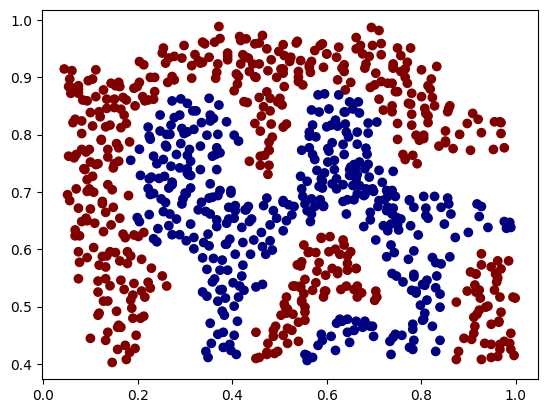

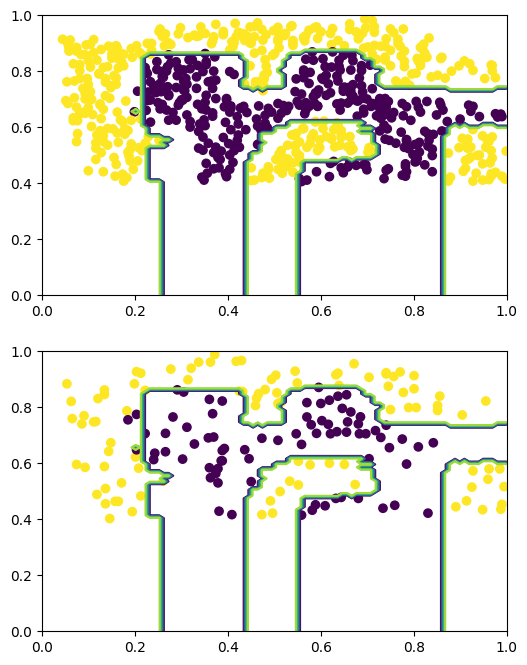

In [36]:
import matplotlib.pyplot as plt  
import numpy as np 
import pandas as pd   
import scipy.io as sio
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
data=sio.loadmat(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex6-SVM\data\ex6data2.mat")
x=data['X']
y=data['y'].ravel()
plt.scatter(x[:,0],x[:,1],c=y.ravel(),cmap='jet')
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,stratify=y,random_state=55
)
p={'max_depth':[3,5,6,7,8,9,11,13],'min_samples_leaf':[2,3,4,5,6,7,8],'min_samples_split':[2,3,4,5,6,7,8],'n_estimators':[100,200,300,400,500]}
#g=GridSearchCV(RandomForestClassifier(),p,cv=5)
model=RandomForestClassifier(
    max_depth=13,
    min_samples_leaf=2,
    min_samples_split=4,
    n_estimators=100
)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
x1=np.linspace(0,1,100)
x1,x2=np.meshgrid(x1,x1)
p=np.c_[x1.ravel(),x2.ravel()]
zz=model.predict(p).reshape(x1.shape)
fig,ax=plt.subplots(2,1,figsize=(6,8))
ax[0].scatter(x_train[:,0],x_train[:,1],c=y_train)
ax[0].contour(x1,x2,zz)
ax[1].scatter(x_test[:,0],x_test[:,1],c=y_test)
ax[1].contour(x1,x2,zz)